In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_images, test_images = train_images / 255, test_images / 255

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 1  정확도:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7789 - loss: 0.6173
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8628 - loss: 0.3743
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8783 - loss: 0.3298
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8866 - loss: 0.3062
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8916 - loss: 0.2929
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8977 - loss: 0.2705
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9012 - loss: 0.2608
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9072 - loss: 0.2516
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9095 - loss: 0.2363
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9101 - loss: 0.2318
313/313 - 1s - 2ms/step - accuracy: 0.8814 - loss: 0.3426

테스트 1  정확도: 0.8813999891281128


In [13]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]
train_images, test_images = train_images / 255, test_images / 255

In [14]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), padding='same', filters=32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size=(3, 3), padding='same', filters=64),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size=(3, 3), padding='same', filters=32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │         200,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,570 (947.54 KB)

 Trainable params: 242,570 (947.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(train_images, train_labels, epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 64s 43ms/step - accuracy: 0.5996 - loss: 1.0734 - val_accuracy: 0.8272 - val_loss: 0.4716
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.8448 - loss: 0.4239 - val_accuracy: 0.8590 - val_loss: 0.3893
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.8708 - loss: 0.3511 - val_accuracy: 0.8777 - val_loss: 0.3370
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.8818 - loss: 0.3192 - val_accuracy: 0.8793 - val_loss: 0.3288
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.8911 - loss: 0.2891 - val_accuracy: 0.8803 - val_loss: 0.3349


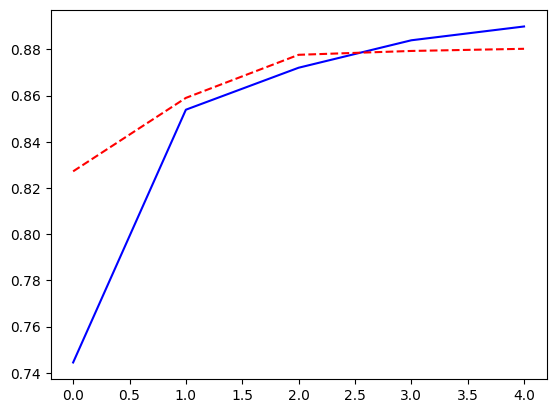

In [16]:
plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 4s - 11ms/step - accuracy: 0.8745 - loss: 0.3596

테스트 정확도: 0.8744999766349792


In [18]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

images = test_images[:50]
pred = np.argmax(model.predict(images), axis=1)

print('예측값 =', pred)
print('실제값 =', test_labels[:50])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
예측값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 7 7 5 1 2 6 0 9 4 8 8 1 3 8 0 7
 5 7 9 0 1 6 7 6 7 2 1 2 6]
실제값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2]
